In [1]:
import pandas as pd
import plotly.express as px

# Development of each team over a two year span

In [2]:
offense = pd.read_csv('improved_offense.csv')
offense.head(2)
offense.columns = ['team', 'average_placement_off', 'std_off', 'median_placement_off']

,Unnamed: 0,average_placement,std,median_placement
0,Arizona Cardinals,6.85,1.058430,1.0
1,Dallas Cowboys,6.00,0.425441,5.5


In [3]:
offense.set_index('team', inplace=True)
offense.head(2)

,average_placement_off,std_off,median_placement_off
team,,,
Arizona Cardinals,6.85,1.058430,1.0
Dallas Cowboys,6.00,0.425441,5.5


In [4]:
defense = pd.read_csv('imporved_defense.csv')
defense.head(2)
defense.columns = ['team', 'average_placement_def', 'std_def', 'median_placement_def']

,Unnamed: 0,average_placement,std,median_placement
0,New England Patriots,6.35,0.874228,2.5
1,San Francisco 49ers,10.30,1.091833,4.5


In [5]:
defense.set_index('team', inplace=True)
defense.head(2)

,average_placement_def,std_def,median_placement_def
team,,,
New England Patriots,6.35,0.874228,2.5
San Francisco 49ers,10.30,1.091833,4.5


In [6]:
df = pd.concat([offense, defense], axis=1, sort=False, )

In [7]:
df.head()

,average_placement_off,std_off,median_placement_off,average_placement_def,std_def,median_placement_def
Arizona Cardinals,6.85,1.058430,1.0,19.20,1.076847,19.5
Dallas Cowboys,6.00,0.425441,5.5,16.25,0.592347,17.0
Baltimore Ravens,11.35,1.027266,6.5,17.40,0.825470,17.5
Tennessee Titans,9.75,0.778380,7.0,21.55,0.696042,24.0
Buffalo Bills,12.40,0.914549,8.5,13.05,0.845858,12.5


# Show which team improved the most overall

In [8]:
import plotly.graph_objects as go

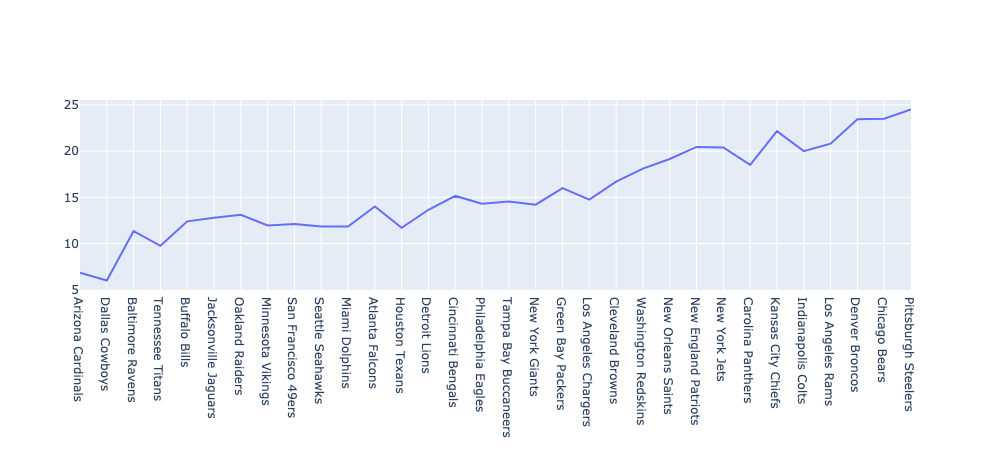

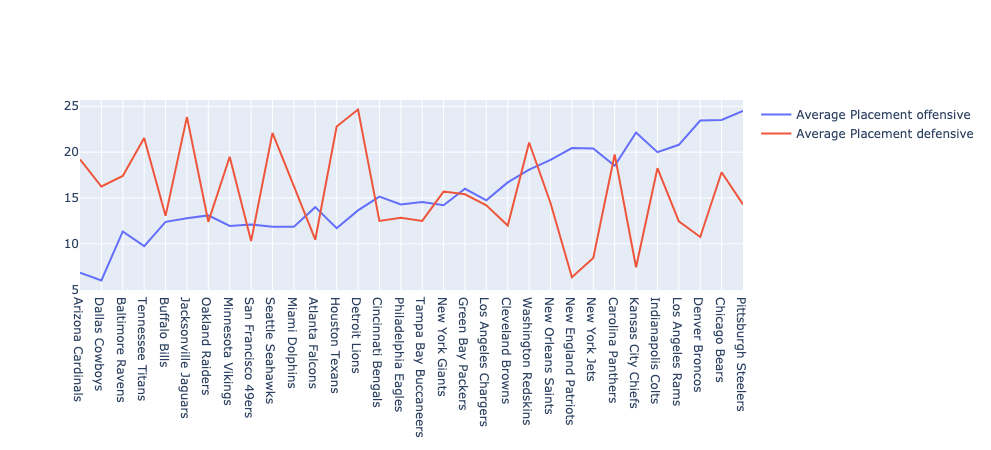

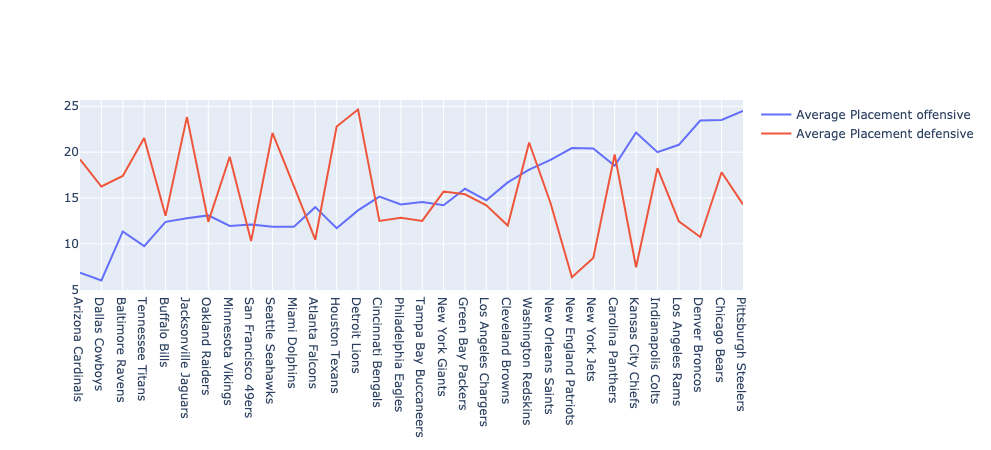

In [16]:
# Create traces
fig = go.Figure()

teams = df.index

fig.add_trace(go.Scatter(x=teams, y=df['average_placement_off'],
                    mode='lines',
                    name='Average Placement offensive'));
fig.add_trace(go.Scatter(x=teams, y=df['average_placement_def'],
                    mode='lines',
                    name='Average Placement defensive'));

fig.show();
fig.write_html('./csv/improved_teams_off.html')

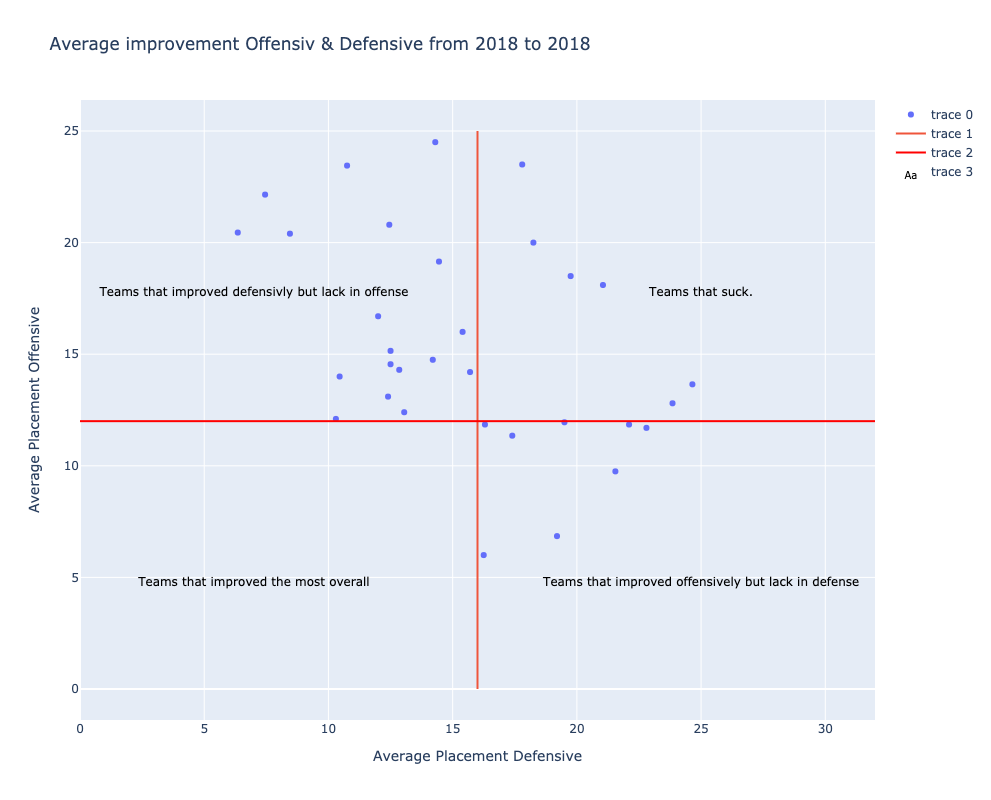

In [15]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['average_placement_def'],
    y=df['average_placement_off'],
    mode="markers",
    hovertext=df.index
))

fig.add_trace(go.Scatter(
    x=[16, 16],
    y=[0, 25],
    mode="lines"
))

fig.add_trace(go.Scatter(
    x=[0, 32],
    y=[12, 12],
    mode="lines", line={'color': 'red'}
))

fig.add_trace(go.Scatter(
    x=[7, 7, 25, 25],
    y=[18, 5, 18, 5],
    mode="text",
    text=["Teams that improved defensivly but lack in offense", "Teams that improved the most overall", "Teams that suck.", "Teams that improved offensively but lack in defense"],
    textfont=dict(color="black", size=12),
    textposition="bottom center"
))

fig.update_layout(
    height=800,
    title_text='Average improvement Offensiv & Defensive from 2018 to 2018'
);

fig.update_xaxes(title_text='Average Placement Defensive');
fig.update_yaxes(title_text='Average Placement Offensive');
fig.write_html('./plots/off_def_improvement_average.html')
fig.write_html('./csv/off_def_improvement_average.html')
fig.show();

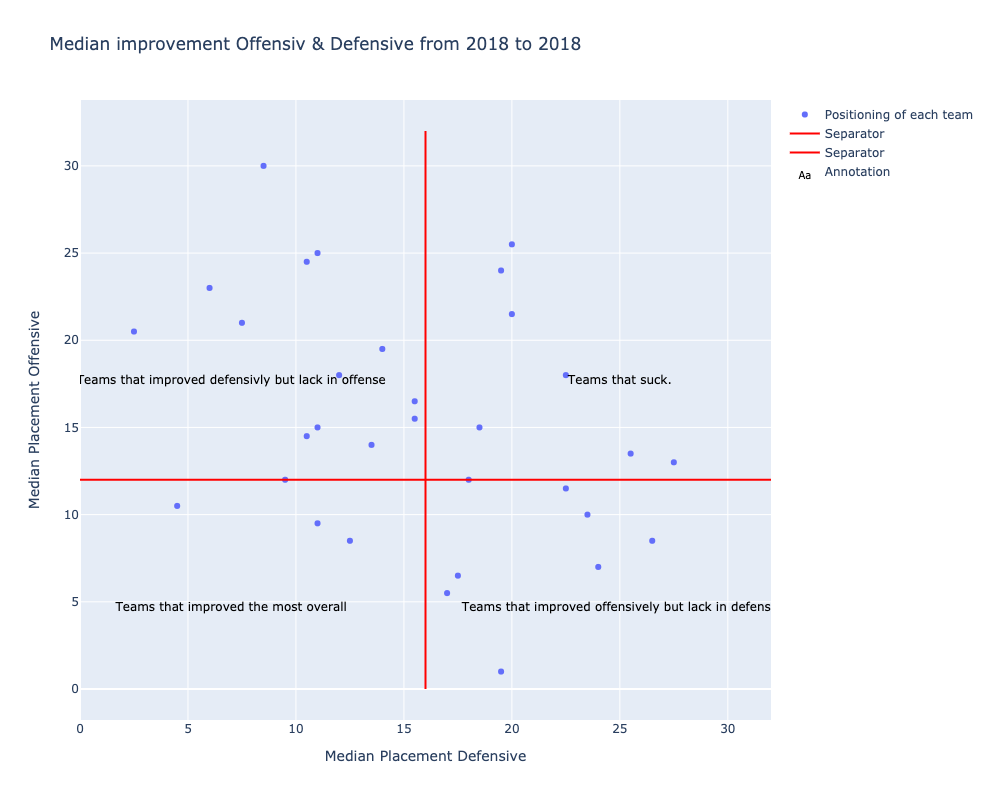

In [14]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['median_placement_def'],
    y=df['median_placement_off'],
    mode="markers",
    hovertext=df.index,
    name='Positioning of each team'
))

fig.add_trace(go.Scatter(
    x=[16, 16],
    y=[0, 32],
    mode="lines",
    line={'color': 'red'},
    name='Separator'
))

fig.add_trace(go.Scatter(
    x=[0, 32],
    y=[12, 12],
    mode="lines",
    line={'color': 'red'},
    name="Separator"
))

fig.add_trace(go.Scatter(
    x=[7, 7, 25, 25],
    y=[18, 5, 18, 5],
    mode="text",
    text=["Teams that improved defensivly but lack in offense", "Teams that improved the most overall", "Teams that suck.", "Teams that improved offensively but lack in defense"],
    textfont=dict(color="black", size=12),
    textposition="bottom center",
    name='Annotation'
))

fig.update_layout(
    height=800,
    title_text='Median improvement Offensiv & Defensive from 2018 to 2018'
);

fig.update_xaxes(title_text='Median Placement Defensive');
fig.update_yaxes(title_text='Median Placement Offensive');
fig.write_html('./plots/off_def_improvement_median.html')
fig.write_html('./csv/off_def_improvement_median.html')

fig.show();